# 생성 모델링 (GAN)

이번 노트북에서는 1~3번 내용들을 개념적으로 다룬 후, 4번 항목부터 생성 모델의 코드 구현과 학습을 진행하겠습니다.
1. 생성 모델링이란? (판별 모델링과 비교하여)
2. 생성 모델링의 목표
3. 주요 생성 모델링의 기법
4. Fashion MNIST Dataset으로 생성 모델의 코드 구현과 학습

---

# 1. 생성 모델링이란?
### 판별 모델링 (Discriminative Modeling)
- 입력된 데이터셋을 특정 기준에 따라 분류하거나, 특정 값을 맞히는 모델
- 예시 : 분류

### 생성 모델링 (Generative Adversarial Networks)
- 학습한 데이터셋과 비슷하면서도 기존에는 없던 새로운 데이터셋을 생성하는 모델
- 데이터셋에서 각 이미지의 특징을 학습해 그와 비슷한 새로운 사진을 만들어내는 것
- 최근 사례: [AWS의 DeepComposer 시연 영상](https://www.youtube.com/watch?v=XH2EbK9dQlg&t=126s)
- 생성자와 판별자(구분자) 2가지 네트워크로 구분

# 2. 생성 모델링의 목표
실제 사진과 거의 구별이 어려울 정도로 좋은 품질의 이미지를 만들어내는 것. (없던 데이터를 생성!)

---

# 3. 생성 모델링 기법 알아보기
## 여러 가지 생성 모델링 기법과 친해지기 (1) Pix2Pix
### Pix2Pix란? 
- 간단한 이미지를 입력할 경우 실제 사진처럼 보이도록 바꿔줄 때 많이 사용되는 모델
- 모델은 아래 그림처럼 단순화된 이미지(Input Image) 와 실제 이미지(Ground Truth) 가 쌍을 이루는 데이터셋으로 학습을 진행
- 왼쪽의 Input Image를 입력받으면, 내부 연산을 통해 실제 사진 같은 형상으로 변환된 Predicted Image를 출력
- 초기에는 모델이 생성한 Predicted Image가 Ground Truth 이미지와 많이 다르겠지만, 계속해서 Ground Truth와 얼마나 비슷한지를 평가하며 점차 실제 같은 결과물을 만들어 내게 됩니다.
- 이렇게 한 이미지를 다른 이미지로 픽셀 단위로 변환한다는 뜻의 Pixel to Pixel을 딴 Pix2Pix로 이름이 붙게 되었습니다.  

![pix2pix](https://d3s0tskafalll9.cloudfront.net/media/images/pix2pix.max-800x600.png)  

위의 예시를 보면 Input Image는 매우 단순화된 이미지이기 때문에 건물의 형태나 창문의 위치 등의 구조적인 정보는 알 수 있지만, 실제 세부적인 디자인이 어떻게 되어 있을지는 사람이라도 정확히 맞추기가 어렵습니다. 그래서 Predicted Image에는 구조적인 정보를 바탕으로 건물 이미지를 만들며 그에 어울리는 세부 디자인을 생성하게 되죠. 그 결과물은 Ground Truth와 완벽하게 똑같지는 않지만, 전체적인 분위기는 비슷한 느낌을 받습니다.

- Pix2pix 모델을 학습시키기 위해 사용되는 데이터셋 구성은 어떻게 해야할까?  
단순화된 이미지(Input Image)와 실제 이미지(Ground Truth)를 쌍으로 데이터셋을 구성해야 합니다.   
단순화된 이미지를 가지고 실제 이미지와 유사하게 변환하는 방법을 배우게 하기 위함입니다.  



- 논문 읽고 오기 : https://arxiv.org/pdf/1611.07004.pdf  
Experiments의 이미지와 눈문 첫머리의 응용 사례 보기
    - 스케치로 그려진 그림을 실사화하기
    - 흑백 사진을 컬러로 변환하기
    - 위성사진을 지도 이미지로 변환하기
    - 낮에 찍힌 사진을 밤 배경의 사진으로 변환하기

## 여러 가지 생성 모델링 기법과 친해지기 (2) CycleGAN
### CycleGAN란?
- Pix2Pix 이후 발전된 모델
- 한 이미지와 다른 이미지를 번갈아 가며 Cyclic하게 변환시킬 수 있는 모델 (ex.모네의 그림을 사진으로, 사진을 다시 그림으로)
- 양방향으로의 이미지 변환이 가능 : 실사 이미지를 그림으로 바꾸는 것과 그림을 실사 이미지로 바꾸는 것 두 가지가 모두 가능
- 그림과 사진의 쌍으로 이루어진 데이터셋이 필요했던 Pix2Pix와 달리, CycleGAN은 쌍이 필요 없다.   

**얼룩말과 말의 예시**  
얼룩말을 그냥 말로, 말을 얼룩말로 서로 변환할 경우 쌍을 이루지 않더라도   
- 그냥 얼룩말이 있는 사진과 말이 있는 사진 각각의 데이터셋만 있다면 CycleGAN을 학습시킬 수 있다.  
- 모델이 스스로 얼룩말과 말 데이터에서 각각의 스타일을 학습해서 새로운 이미지에 그 스타일을 입힐 수 있도록 설계되었기 때문


딥러닝에서 쌍으로 된 데이터(paired data)가 필요 없다는 것은   
- 데이터를 구하기 훨씬 쉽고,
- 라벨을 붙이는 주석(annotation) 비용이 필요 없다는 것을 뜻하므로  
굉장히 큰 장점이다.
![Zebra and horse](https://d3s0tskafalll9.cloudfront.net/media/images/CycleGAN.max-800x600.png)  

**CycleGAN의 또 다른 유명한 활용 사례는 바로 실제 사진을 모네 또는 고흐 같은 화가가 그린 그림처럼 바꾸는 것**  
- 하나의 사진만으로도 모네가 그린 그림, 고흐가 그린 그림 등으로 마음대로 변환 시켜 볼 수 있다.
- CycleGAN이기 때문에 그림을 사진처럼 변환시키는 반대의 경우도 가능
![Monet and Gogh](https://d3s0tskafalll9.cloudfront.net/media/images/CycleGAN2.max-800x600.jpg)

Q. 지금까지 살펴본 Pix2Pix와 CycleGAN의 가장 큰 차이점 두 가지는 무엇일까?
- Pix2Pix는 한 방향으로의 변환만 가능하지만, CycleGAN은 양방향으로의 변환을 할 수 있다.
- Pix2Pix는 입력 데이터와 출력 데이터끼리 쌍으로 이루어진 데이터셋이 필요하지만, CycleGAN은 필요 없다.

## 여러 가지 생성 모델링 기법과 친해지기 (3) Neural Style Transfer
### Neural Style Transfer이란?
- 원하는대로 이미지의 스타일을 변환시키는 것
- 전체 이미지의 구성을 유지하고 싶은 Base Image와 입히고 싶은 스타일이 담긴 Style Image 두 장을 활용해 새로운 이미지를 만들어 내는 것
![예시](https://d3s0tskafalll9.cloudfront.net/media/images/StyleTransfer.max-800x600.png)  
- 왼쪽 맨 위의 이미지가 Base Image이고, 나머지 다섯 개의 이미지에 작게 붙어있는 이미지가 Style Image
- Base Image에서는 Content(내용)만, 그리고 Style Image에서는 Style(스타일)만 추출해서 합친 결과물
    - Base Image : 건물, 강, 하늘 등
    - Style Image : 텍스처, 색상 등

 실제로 이러한 결과를 만들어내는 과정 속에는 다양한 최적화가 포함되어 있습니다.   
Base Image의 내용은 잃지 않으면서, Style Image의 스타일을 효과적으로 입히기 위한 정교한 손실 함수들이 짜여 있습니다.   
오늘 이 모든 이야기를 다룰 수는 없으니, 혹시 궁금하다면 Neural Style Transfer를 검색해서 더 다양한 스타일 변환 결과와 원리를 한번 찾아보세요!
---

# 4. Fashion MNIST Dataset으로 생성 모델의 코드 구현과 학습
## 패션을 디자인하려면? 먼저 패션을 배워야지! (1)
### Fashion MNIST
#### 모델에게 필요한 것은?
여러 패션을 접하며 옷, 신발 또는 드레스와 같은 것이 어떻게 생겼는지 학습한 후 새로운 디자인을 만들어내야 합니다.
#### Fashion Mnist Dataset 알아보기
- https://github.com/zalandoresearch/fashion-mnist
- 데이터셋 : 70,000장 (training set 60,000장 / test set 10,000장)
- 이미지 사이즈 : 28x28
- Fashion MNIST가 만들어진 이유 세 가지
    - MNIST is too easy. (MNIST는 너무 쉽다.)
    - MNIST is overused. (MNIST는 너무 많이 쓰였다.)
    - MNIST can not represent modern CV tasks. (MNIST는 요즘의 Computer Vision 문제에 적용될 수 없다.)
    

- 카테고리의 라벨  
10가지 패션 카테고리가 0~9의 숫자 Label로 표시되었다.  

    0: T-shirt/top  
    1: Trouser  
    2: Pullover  
    3: Dress  
    4: Coat  
    5: Sandal  
    6: Shirt  
    7: Sneaker  
    8: Bag  
    9: Ankle boot  

## 패션을 디자인하려면? 먼저 패션을 배워야지! (2) 코드로 살펴보기
### 패키지 불러오기
- 신경망 구성에 필요한 텐서플로우
- 이미지와 GIF를 다루는 데 쓰이는 imageio, display, matplotlib, PIL 등   
여러 가지 패키지가 필요합니다.

#### 라이브러리 설치여부 확인하기
-  Cloud Shell 에서 입력하기  
$ pip list | grep -E 'imageio|Pillow'  

    - pip list: 현재 Python 환경에 설치된 모든 패키지를 나열합니다.
    - | : 파이프(pipe) 기호는 왼쪽 명령의 출력을 오른쪽 명령의 입력으로 전달하는 데 사용됩니다.
    - grep -E 'imageio|Pillow': grep은 특정 문자열을 검색하는 명령어이며, 여기서는 정규 표현식을 사용하여 'imageio' 또는 'Pillow' 문자열을 찾습니다.


- imageio, pillow 라이브러리가 없을 경우 설치하기.  
$ pip install imageio

    $ pip install Pillow

#### 작업환경 구성
3개의 디렉토리를 생성
- 딥러닝 모델 학습 중에 생성된 이미지 샘플
- 학습 체크포인트
- 학습 이력  
을 저장하기 위한 디렉토리를 만드는데 사용

In [1]:
# 작업환경 구성
# 1회 이상 실행시 오류가 발생합니다.
! mkdir -p ~/aiffel/dcgan_newimage/fashion/generated_samples
! mkdir -p ~/aiffel/dcgan_newimage/fashion/training_checkpoints
! mkdir -p ~/aiffel/dcgan_newimage/fashion/training_history

In [2]:
# 패키지 불러오기
import os     # 운영 체제와 상호 작용하기 위한 os 모듈
import glob   # 파일 경로에 대한 패턴 매칭을 위한 glob 모듈
import time   # 시간과 관련된 기능을 사용하기 위한 time 모듈

import PIL          # 이미지 처리를 위한 Python Imaging Library인 PIL(Pillow)
import imageio      # 이미지 입출력을 위한 imageio 모듈
import numpy as np  # 다차원 배열 및 수학적 연산을 위한 NumPy 라이브러리
import tensorflow as tf
from tensorflow.keras import layers    # TensorFlow의 Keras API에서 층을 정의하는 데 사용되는 layers 모듈
from IPython import display            # IPython의 display 모듈에서 display 함수. 주로 이미지나 동적인 콘텐츠를 출력하기 위해 사용
import matplotlib.pyplot as plt        # 데이터 시각화를 위한 Matplotlib 라이브러리에서 pyplot 모듈
%matplotlib inline
# IPython 환경에서 Matplotlib의 그림을 인라인으로 표시하도록 하는 IPython 매직 명령어

print("tensorflow", tf.__version__)

tensorflow 2.6.0


### 데이터셋 가져오기
- fashion_mnist 데이터는 우리가 인터넷에서 따로 다운로드할 필요 없이,tf.keras 안에 있는 datasets에 이미 들어가 있어서 꺼내기만 하면 된다.
- load_data()로 데이터를 로딩
- 분류 문제와 달리 어떤 카테고리인지 나타내주는 라벨이 필요 없음. 
    - 즉 y_train, y_test에 해당하는 데이터를 쓰지 않음.
    - 코드에서 _ (언더스코어)로 해당 데이터들은 무시하도록 한다.
    - [파이썬 언더스코어(_)에 대하여](https://mingrammer.com/underscore-in-python/#2-%EA%B0%92%EC%9D%84-%EB%AC%B4%EC%8B%9C%ED%95%98%EA%B3%A0-%EC%8B%B6%EC%9D%80-%EA%B2%BD%EC%9A%B0)


In [3]:
# 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, _), (test_x, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Fashion MNIST 또한 MNIST와 같이 28x28 픽셀의 이미지로, 각 픽셀은 0~255 사이의 정숫값을 가집니다. 

In [4]:
# 이미지의 픽셀 범위 확인
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


각 픽셀을 -1, 1로 정규화시켜서 사용할 예정이므로, 중간값을 0으로 맞춰주기 위해 127.5를 뺀 후 127.5로 나눠줍니다.

In [5]:
# 픽셀 값 정규화 : -1에서 1사이의 값으로
train_x = (train_x - 127.5) / 127.5

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [6]:
# 데이터의 shape 확인
train_x.shape

(60000, 28, 28)

#### Shape에 채널 수 추가하기
- 딥러닝에서 이미지를 다루려면 채널 수에 대한 차원이 필요합니다. 
- 입력되는 이미지 데이터의 채널 수는 어떤 이미지냐에 따라 달라지는데요,   
컬러 이미지의 경우 R, G, B 세 개의 채널이 있고, Gray Scale(흑백)의 경우 1개의 채널만 존재합니다. 
- Fashion MNIST 데이터는 흑백 이미지이므로, 채널 값은 1이죠.   
따라서 데이터셋의 shape 마지막에 1을 추가해 주도록 하겠습니다.

In [7]:
# shape에 채널 수 (1 : 흑백) 추가하기
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
train_x.shape

(60000, 28, 28, 1)

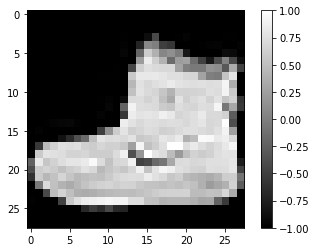

In [8]:
# 첫 번째 데이터를 꺼내서 어떻게 생겼는지 확인
plt.imshow(train_x[0].reshape(28, 28), cmap='gray')
plt.colorbar()   # 각 픽셀의 값과 그에 따른 색을 확인
plt.show()

첫 번째, 즉 index 0의 이미지는 신발  
- plt.colorbar() 를 이용해 오른쪽에 각 픽셀의 값과 그에 따른 색도 확인해 보았습니다. 
    - 픽셀에는 우리가 정규화 해준 대로 -1 ~ 1 사이의 값을 가지고, 
    - -1이 가장 어두운 검은색, 1이 가장 밝은 흰색을 띤다고 표시되어 있습니다.

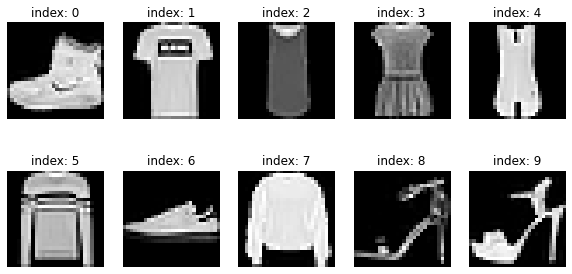

In [9]:
# 10개 데이터 한 번에 확인하기 - for문 활용

plt.figure(figsize=(10, 5))   # 이미지의 전체 프레임의 크기를 결정

for i in range(10):
    plt.subplot(2, 5, i+1)   # 여러 개의 이미지를 한 번에 띄우고 싶을 때에는 plt.subplot(row, col, index)의 형태로 확인
    plt.imshow(train_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

10개의 이미지를 2x5의 배열 형태로 보고 싶은 경우, plt.subplot(2, 5, index)로 작성합니다.
- index는 1부터 10까지 순서대로 바뀌어야 하니 for문에서 사용하는 i에 1을 i+1을 넣어주면 됩니다. 
- i는 range(10)으로 꺼냈으니 0~9의 숫자로 반복되죠  

추가적으로 plt.title('title') 함수를 이용해서 이미지에 제목으로 라벨 값을 넣어줬고,   
plt.axis('off') 함수로 불필요한 축을 지워서 깔끔하게 나타냈습니다.

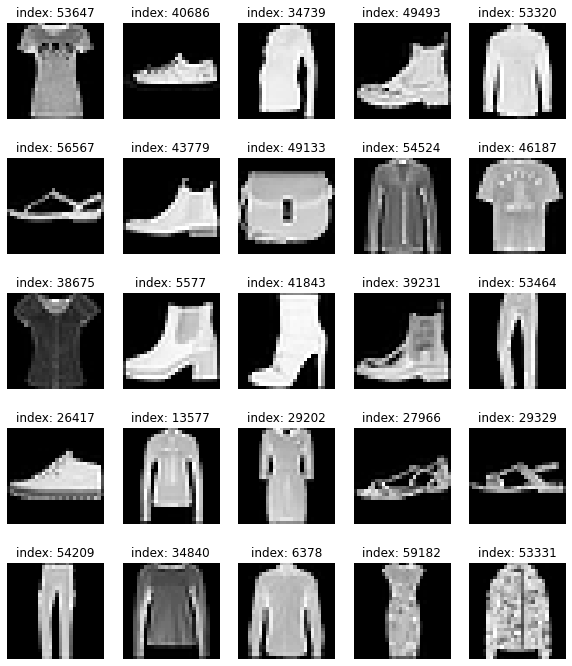

In [10]:
# 이미지 25개를 5x5 배열로 띄워보기. 모든 이미지는 train_images에서 랜덤으로 추출하기.
# (numpy에서 랜덤으로 정수를 추출해 주는 함수를 활용)

plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 60000)
    plt.imshow(train_x[random_index].reshape(28, 28), cmap='gray')
    plt.title(f'index: {random_index}')
    plt.axis('off')

plt.show()

numpy.random.randint(low, high=None, size=None, dtype=int)  
- low: 이 인수는 생성될 값의 범위에서 가장 작은 정수를 지정합니다. high도 지정된 경우, 이 인수는 범위의 포함하는 하한값을 나타냅니다.
- high: 이 인수는 생성될 값의 범위에서 가장 큰 정수를 지정합니다. 이 인수가 지정되지 않은 경우, 범위의 상한값은 2^31-1(32비트 시스템에서) 또는 2^63-1(64비트 시스템에서)으로 지정됩니다.
- size: 이 인수는 생성될 정수의 개수를 지정합니다. 
        - 이 인수는 정수 또는 정수의 튜플로 지정할 수 있습니다. 
        - 예를 들어, size=3은 1차원 배열로 3개의 정수를 생성하고, size=(2,3)은 2차원 배열로 2개의 행과 3개의 열을 가진 배열을 생성합니다.
- dtype: 이 인수는 생성될 값의 데이터 유형을 지정합니다. 
        - 이 인수의 기본값은 int로 32비트 정수입니다. 다른 데이터 유형을 지정하려면 numpy 데이터 유형 중 하나를 사용해야 합니다.

#### 텐서플로우의 Dataset을 이용해 준비해 놓기
이를 이용하면 매번 모델에게 직접 섞어서 넣어주지 않아도 됩니다. 

In [11]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

- BUFFER_SIZE은 전체 데이터를 섞기 위해 60,000으로 설정합니다. shuffle() 함수가 데이터셋을 잘 섞어서 모델에 넣어줄 것입니다.  
    - [텐서플로우 공식 문서: tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle)

                                     
- 미니 배치 학습 방식                                 
BATCH_SIZE는 모델이 한 번에 학습할 데이터의 양입니다.  
너무 많은 양을 한 번에 학습시키면 메모리 활용 면에서도 비효율적이고, 한 번 학습을 하는 데에도 오래 걸리므로 적절한 사이즈로 잘라서 학습을 진행합니다.   

In [12]:
# 미니 배치 학습 
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

tf.data.Dataset 모듈의 from_tensor_slices() 함수를 사용하면 리스트, 넘파이, 또는 텐서플로우의 텐서 자료형에서 데이터셋을 만들 수 있습니다.  위 코드는 train_x라는 넘파이 배열(numpy ndarray)형 자료를 섞고, 이를 배치 사이즈에 따라 나누도록 합니다.   
데이터가 잘 섞이게 하기 위해서는 버퍼 사이즈를 총 데이터 사이즈와 같거나 크게 설정하는 것이 좋습니다.

- tf.data.Dataset.from_tensor_slices(train_x): 이 부분은 주어진 넘파이 배열 train_x를 기반으로 tf.data.Dataset을 생성합니다. 
        - from_tensor_slices 함수는 주어진 배열을 슬라이스(slice)하여 각 요소를 생성하는 역할을 합니다.
        - 각 슬라이스를 데이터셋의 하나의 요소로 간주합니다.
- .shuffle(BUFFER_SIZE): 데이터셋을 무작위로 섞기 위한 메서드입니다. 
    - BUFFER_SIZE는 섞을 때 사용되는 버퍼의 크기를 나타냅니다. 더 큰 버퍼 크기는 더 큰 무작위성을 가져올 수 있지만 메모리 사용량이 증가할 수 있습니다.

- .batch(BATCH_SIZE): 이 메서드는 데이터셋의 요소들을 배치로 묶어주는 역할을 합니다. 
    - BATCH_SIZE는 각 배치의 크기를 나타냅니다. 
    - 배치는 모델이 한 번에 처리하는 데이터의 양을 나타내며, 큰 데이터셋을 작은 배치로 나누어 모델에 공급하는 데 사용됩니다.

# GAN 이해 및 구현하기
## 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (1) GAN 이해하기
### GAN이란?
가장 간단한 형태의 생성 모델 중 하나는 바로 GAN(Generative Adversarial Network)입니다.   
GAN은 2014년 Ian Goodfellow라는 연구자에 의해 처음 나온 네트워크로, 발표된 후 독특하면서도 직관적인 아이디어로 많은 인기를 얻었고 지금까지도 굉장히 많은 연구가 이루어지고 있는 모델입니다.

맨 처음 DeepComposer 영상에서도 설명했듯, **GAN에는 두 가지 네트워크**가 있습니다.
- 생성자(Generator)는 아무 의미 없는 랜덤 노이즈로부터 신경망에서의 연산을 통해 이미지 형상의 벡터를 생성해 냅니다.  
즉, 무에서 유를 창조하는 것과 같은 역할을 합니다.
- 판별자(Discriminator)는 기존에 있던 진짜 이미지와 생성자가 만들어낸 이미지를 입력받아 각 이미지가 Real 인지, Fake 인지에 대한 판단 정도를 실숫값으로 출력합니다.



Ian Goodfellow가 GAN을 처음 발표했던 2014년의 논문에서는 이 두 네트워크를 다음과 같이 비유했습니다. 
> 원문 보기  
> "In the proposed adversarial nets framework, the generative model is pitted against an adversary: a discriminative model that learns to determine whether a sample is from the model distribution or the data distribution. The generative model can be thought of as analogous to a team of counterfeiters, trying to produce fake currency and use it without detection, while the discriminative model is analogous to the police, trying to detect the counterfeit currency. Competition in this game drives both teams to improve their methods until the counterfeits are indistiguishable from the genuine articles." (출처 : https://arxiv.org/pdf/1406.2661.pdf)


- Generative Model과 Discriminative Model은 각각 무엇에 비유되었나요?  
Generative Model : 위조지폐를 만들어내는 팀  
Discriminative Model : 위조 지폐범을 잡아내는 경찰  

    
- 두 팀을 모두 성장하게 하는 요인은 무엇이며, 궁극적인 목표는 무엇인가요?
    - 위조지폐를 만들어내는 팀은 잡히지 않기 위해 더 진짜 같은 지폐를 만들려고 하며, 그것을 잡아내려는 경찰은 끊임없이 진짜 지폐와 위조지폐를 구분하려고 한다. 즉, 서로 간의 경쟁이 둘 모두를 성장하게 한다. 
    - 궁극적인 목표는 진짜 지폐와 구분될 수 없는 위조지폐를 만들어 내는 것이다.
    
    
**이렇게 서로 경쟁하듯 이루어진 모델의 구조 덕분에 이름에 "Adversarial(적대적인)"이 들어가게 된 것입니다.**  
![gan](https://d3s0tskafalll9.cloudfront.net/media/images/GAN.max-800x600.png)

#### GAN과 생성 모델 다시 정리하기
추가로 GAN에 대한 여러 가지 설명이 잘 나와 있는 2016년의 OpenAI 글을 한번 읽어봅시다.  
전부 읽는 것은 어려울 수 있으니, 퀴즈의 답을 찾아보며 훑어보도록 하겠습니다!  

- 읽고 오기 : [Generative Models - openai](https://openai.com/research/generative-models)

- Q. GAN 중 특히 합성곱 층(Convolutional Layer)으로 이루어진 딥러닝 모델을 DCGAN (Deep Convolutional GAN) 이라고 합니다. 본 글에서 설명한 DCGAN은 무엇을 입력받아 무엇을 출력하나요?   
    - 균일 분포에서 추출한 100개의 난수를 입력하고(이를 빨간색으로 코드 또는 잠재 변수라고 함)   
    Input : 100 random numbers drawn from a uniform distribution (called as a code, or latent variables)  
    - 1개의 이미지를 출력합니다(이 경우 오른쪽의 64x64x3 이미지, 녹색).  
    Output : an image (in this case 64x64x3 images)
    
> 참고 : Random noise는 생성자의 input! (Latent Vector)
    
![DCGAN](https://images.openai.com/blob/138c84f9-282a-48c4-b124-697aa9593cfb/gen_models_diag_1.svg?width=10&height=10&quality=50)  


- Q. 글에서는 GAN을 포함해 총 세 가지의 생성 모델링 기법을 소개하였습니다. 나머지 두 가지는 무엇인가요?  
Variational Autoencoders (VAEs)  
Autoregressive models (ex. Pixel RNN)

## 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (2) 생성자 구현하기
> GAN에는 생성자, 판별자 모델 두 개가 있습니다.

오늘 우리가 구현해 볼 모델은 DCGAN(Deep Convolutional GAN)입니다.   
DCGAN은 GAN의 개념이 처음 소개된 1년 반 이후 발표된 논문으로서, 이전의 GAN을 더욱 발전시켜서 훨씬 그럴듯한 고화질 이미지 생성을 이루어낸 첫 번째 논문으로 평가받고 있습니다.   
이후 발표된 수많은 GAN 기반 이미지 생성 모델들은 대부분 DCGAN 모델을 발전시킨 형태라고 할 수 있으므로, 그 구조를 상세히 살펴보고 구현 연습을 해보는 것은 매우 의미 있다고 생각됩니다.


모델의 구현은 Keras Sequential API를 활용하겠습니다.   
이후 소개하는 코드는 [Tensorflow 2.0 Tutorial의 DCGAN 구현](https://www.tensorflow.org/tutorials/generative/dcgan?hl=ko)을 기반으로 상세한 설명을 추가하였습니다.

In [38]:
# 생성자 모델(generator model) 구현

def make_generator_model():

	# Start
	model = tf.keras.Sequential()

	# First: Dense layer
	# units은 7x7x256, 편향은 사용하지 않음, 입력 값의 크기는 100차원 벡터
	model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100, )))
	# 배치 정규화 사용
	model.add(layers.BatchNormalization())
	# LeakyReLU 활성화 함수 사용
	model.add(layers.LeakyReLU())

	# Second: Reshape layer
	model.add(layers.Reshape((7, 7, 256)))
	assert model.output_shape == (None, 7, 7, 256)   # 주목: 배치사이즈로 None이 주어집니다.

	# Third: Conv2DTranspose layer
	# 커널 크기는 5, stride는 1, 패딩은 사용, 편향은 사용하지 않음
	model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
	# assert는 주어진 조건이 True인지 확인하는 데 사용되는 파이썬의 문장. False인 경우 AssertionError 예외가 발생하며, 프로그램이 중단된다.
	assert model.output_shape == (None, 7, 7, 128)
	# 배치 정규화 사용
	model.add(layers.BatchNormalization())
	# LeakyReLU 활성화 함수 사용
	model.add(layers.LeakyReLU())

	# Fourth: Conv2DTranspose layer
	# 커널 크기는 5, stride는 2, 패딩은 사용, 편향은 사용하지 않음
	model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
	assert model.output_shape == (None, 14, 14, 64)
	# 배치 정규화 사용
	model.add(layers.BatchNormalization())
	# LeakyReLU 활성화 함수 사용
	model.add(layers.LeakyReLU())

	# Fifth: Conv2DTranspose layer
	model.add(layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
										activation='tanh'))
	assert model.output_shape == (None, 28, 28, 1)

	return model

make_generator_model이라는 함수를 만들어서 언제든 생성자를 생성할 수 있도록 했습니다.  

함수 내부에서는 먼저 tf.keras.Sequential()로 모델을 시작한 후 레이어를 차곡차곡 쌓아줍니다.  

여기에서 가장 중요한 레이어는 바로 Conv2DTranspose 레이어입니다. 
- Conv2DTranspose 층은 일반적인 Conv2D와 반대로 이미지 사이즈를 넓혀주는 층입니다. 
- 이 모델에서는 세 번의 Conv2DTranspose 층을 이용해 (7, 7, 256) → (14, 14, 64) → (28, 28, 1) 순으로 이미지를 키워나갑니다. 
- 여기서 최종 사이즈인 (28, 28, 1)은 우리가 준비했던 데이터셋과 형상이 동일합니다.

> [What is Transposed Convolutional Layer?](https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11)  

레이어의 사이사이에 특정 층들이 반복되는 것을 확인할 수 있는데, BatchNormalization 레이어는 신경망의 가중치가 폭발하지 않도록 가중치 값을 정규화시켜줍니다.   
또한 중간층들의 활성화 함수는 모두 LeakyReLU를 사용하였습니다.   
다만 마지막 층에는 활성화 함수로 tanh를 사용하는데, 이는 우리가 -1 ~ 1 이내의 값으로 픽셀 값을 정규화시켰던 데이터셋과 동일하게 하기 위함입니다.  
- [Batch Normalization](https://eehoeskrap.tistory.com/430)
- [활성화 함수 (activation function)](https://newly0513.tistory.com/20)

Q. 생성자의 입력 벡터는 어떤 형태입니까?    
모델은 입력값으로 (batch_size, 100) 형상의 노이즈 벡터를 받습니다.

Q. 처음 입력된 벡터는 어떤 레이어를 지나며, 첫 레이어를 지난 후의 shape는 어떤 형태입니까?  
입력된 (batch_size, 100) 벡터는 7 x 7 x 256 = 12544개의 노드를 가진 첫 번째 Dense 레이어를 거치며 (batch_size, 12544) 형상의 벡터가 됩니다.  

Q. 첫 번째 레이어를 지난 후 벡터는 어떤 층을 지나게 됩니까? 이 레이어는 왜 필요합니까?  
첫 번째 레이어를 지난 후 벡터는 Reshape 레이어를 지나게 됩니다.  
이는 이후의 Layer에서 Convolutional 연산을 할 수 있도록 1차원 벡터를 (7, 7, 256) 형상의 3차원 벡터로 변환시키는 작업입니다.

In [15]:
# 생성 모델을 generator라는 변수로 생성하고, 모델 세부 내용인 summary를 출력

generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

shape=(1, 100)의 형상을 가지는 랜덤 노이즈 벡터를 생성해서 결과물을 한번 만들어 보도록 하겠습니다.  
아직 모델이 학습되지 않았으니, 아마 결과물도 큰 의미가 있지는 않을 것입니다.  

tf.random.normal을 이용하면 가우시안 분포에서 뽑아낸 랜덤 벡터로 이루어진 노이즈 벡터를 만들 수 있습니다.

In [16]:
# 랜덤 노이즈 벡터 만들기
noise = tf.random.normal([1, 100])

텐서플로우 2.0 이후 버전에서는 레이어와 모델에 call 메소드를 구현해 놓기 때문에,   
방금 만들어진 생성자 모델에 입력값으로 노이즈를 넣고 바로 모델을 호출하면 간단히 결과 이미지가 생성됩니다.  
(내부적으로는 생성자의 call 함수가 호출됩니다.)  

단, 지금은 학습하는 중이 아니니 training=False를 설정해 주어야 합니다!  

Batch Normalization 레이어는 훈련 시기와 추론(infernce) 시기의 행동이 다르기 때문에 training=False을 주어야 올바른 결과를 얻을 수 있습니다.

In [17]:
# 랜덤 노이즈 벡터로 결과물 만들어보기
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 28, 28, 1])

[1, 28, 28, 1] 사이즈의 이미지가 잘 생성되었군요!     
첫 번째 1은 1개(batch_size=1)라는 뜻을, 그 뒤로는 (28, 28, 1) 사이즈 이미지가 생성되었다는 뜻을 가집니다.  

그러면 이 이미지를 또 시각화해서 봐야겠습니다.  
matplotlib 라이브러리는 2차원 이미지만 보여줄 수 있으므로 0번째와 3번째 축의 인덱스를 0으로 설정해서 (28, 28) shape의 이미지를 꺼낼 수 있도록 해야 합니다. 

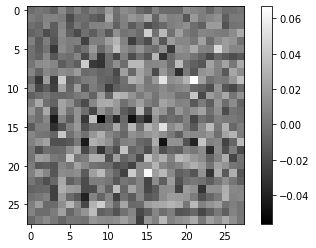

In [18]:
# 이미지 시각화

plt.imshow(generated_image[0, :, :, 0], cmap='gray')   # 2차원 이미지만 보여줄 수 있으므로 0, 3번째 축의 인덱스 0으로 설정하여 이미지 꺼내기
plt.colorbar()
plt.show()

역시 -1과 1 사이의 값에서 적당히 잘 생성된 것을 확인할 수 있습니다.  
아직은 모델이 전혀 학습하지 않은 상태이기 때문에 아무런 의미가 없는 노이즈 같은 이미지가 생성되었지만, 모델이 점차 학습해 나가며 제대로 된 이미지를 생성하기를 바라봅니다.

## 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (3) 판별자 구현하기
판별자는 앞서 알아봤듯 가짜 이미지와 진짜 이미지를 입력받으면 **각 이미지 별로 '진짜라고 판단하는 정도'값을 출력**해야 합니다.  
그렇다면 입력은 (28, 28, 1) 크기의 이미지가, 출력은 단 하나의 숫자(진짜라고 판단하는 정도)가 될 것입니다.

In [19]:
# 판별자 모델 구현 (discriminator model)

def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    # 필터의 크기는 5이며 64개 사용, stride는 2, 패딩은 사용, 입력 값의 크기는 준비된 흑백 사진
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    # LeakyReLU 활성화 함수 사용
    model.add(layers.LeakyReLU())
    # Dropout은 0.3을 사용
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    # 필터의 크기는 5이며 128개 사용, stride는 2, 패딩은 사용
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    # LeakyReLU 활성화 함수 사용
    model.add(layers.LeakyReLU())
    # Dropout은 0.3을 사용
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

Conv2DTranspose 층을 사용해서 이미지를 키워나갔던 생성자와 반대로, 판별자는 Conv2D 층으로 이미지의 크기를 점점 줄여나갑니다.  
첫 번째 Conv2D 층에서 입력된 [28, 28, 1] 사이즈의 이미지는 다음 층을 거치며 (28, 28, 1) → (14, 14, 64) → (7, 7, 128)까지 줄어들게 됩니다.  

마지막에는 Flatten 층을 사용해 3차원 이미지를 1차원으로 쭉 펴서 7x7x128=6272, 즉 (1, 6272) 형상의 벡터로 변환합니다.   
이는 생성자의 Reshape 층에서 1차원 벡터를 3차원으로 변환했던 것과 정확히 반대 역할을 합니다.   
1차원 벡터로 변환한 후에는 마지막 Dense Layer를 거쳐 단 하나의 값을 출력하게 됩니다.

In [20]:
# 판별 모델을 discriminator라는 변수 이름으로 생성하고, 모델 세부 내용인 summary를 출력

discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [21]:
# 아까 생성했던 가짜 이미지를 판별자에 입력하고 결과 확인해보기

decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.0009726]], dtype=float32)>

텐서플로우의 텐서 형태로 출력이 되었습니다. 이 값 또한 아직은 아무런 의미가 없는 값일 것입니다.  
이제 모델 학습을 합니다.

# 모델 학습
## 생성 모델이 똑똑해지기 위한 기나긴 여정 (1) 손실함수와 최적화 함수
딥러닝 모델이 학습하기 위해서 꼭 필요한 두 가지는, 바로 손실함수(loss function)와 최적화 함수(optimizer) 입니다.

### 손실함수(loss function) - 교차 엔트로피(Cross Entropy)
GAN은 손실함수로 교차 엔트로피(Cross Entropy)를 사용합니다.  
- 교차 엔트로피는 앞서 분류 모델을 설계할 때 많이 사용했던 손실함수이죠. 
- 점점 가까워지기 원하는 두 값이 얼마나 큰 차이가 나는지를 정량적으로 계산할 때 많이 쓰입니다. 
- 특히 판별자는 한 개의 이미지가 가짜인지 진짜인지 나타내는 2개 클래스 간 분류 문제를 풀어야 하므로, 이진 교차 엔트로피(binary cross entropy)를 사용할 것입니다.  

생성자와 판별자의 목적  
- 생성자는 자기가 생성한 Fake Image를 판별자가 진짜라고 판단하도록 속이고 싶어 합니다. 
- 판별자는 생성자가 생성한 가짜 이미지를 가짜로, 진짜 이미지를 진짜로 잘 판별하는 것이 목표입니다.

Real Image에 대한 라벨을 1, Fake Image에 대한 라벨을 0으로 두었을 때, 각각의 손실함수를 이용해 정량적으로 달성해야 하는 목표하는 결과는 다음과 같겠죠.   

- 생성자 : 판별자가 Fake Image에 대해 판별한 값, 즉 D(fake_image) 값이 1에 가까워지는 것
- 판별자 : Real Image 판별값, 즉 D(real_image)는 1에, Fake Image 판별값, 즉 D(fake_image)는 0에 가까워지는 것

결국 생성자든 구분자든, 결국 손실함수에 들어가는 값은 모두 판별자의 판별값이 되겠네요! 이러한 기준을 가지고 생성자, 판별자 각각에 대한 손실함수를 설계해 봅시다.  

- 손실함수에 사용할 교차 엔트로피 함수는 tf.keras.losses 라이브러리 안에 있습니다.
- 다만, 우리가 교차 엔트로피를 계산하기 위해 입력할 값은 판별자가 판별한 값인데, 판별자 모델의 맨 마지막 Layer에는 값을 정규화시키는 sigmoid나 tanh 함수와 같은 활성화 함수가 없었습니다. 즉, 구분자가 출력하는 값은 범위가 정해지지 않아 모든 실숫값을 가질 수 있죠.
- 그런데 tf.keras.losses의 BinaryCrossEntropy 클래스는 기본적으로 본인에게 들어오는 인풋값이 0-1 사이에 분포하는 확률값이라고 가정합니다 (참고). 따라서 from_logits를 True로 설정해 주어야 BinaryCrossEntropy에 입력된 값을 함수 내부에서 sigmoid 함수를 사용해 0~1 사이의 값으로 정규화한 후 알맞게 계산할 수 있습니다.

In [22]:
# 판별값을 0~1 사이의 값으로 정규화할 수 있도록 설정

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

cross_entropy를 활용해 계산할 loss들은 fake_output와 real_output, 두 가지를 활용합니다.  

- fake_output : 생성자가 생성한 Fake Image를 구분자에 입력시켜서 판별된 값, 즉 D(fake_image)
- real_output : 기존에 있던 Real Image를 구분자에 입력시켜서 판별된 값, 즉 D(real_image)  
    
그럼 이제, fake_output과 real_output을 각각 1 또는 0에 비교를 해야 하는데, 어떻게 비교할 수 있을까요?  

바로 tf.ones_like()와 tf.zeros_like() 함수를 활용하면 됩니다.  
이 함수들은 특정 벡터와 동일한 크기이면서 값은 1 또는 0으로 가득 채워진 벡터를 만들고 싶을 때 사용합니다.  
어떤 식으로 활용되는지, 한번 실험해 볼까요?

In [23]:
# tf.ones_like()와 tf.zeros_like() 함수 활용해보기

vector = [[1, 2, 3],
          [4, 5, 6]]

tf.ones_like(vector)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

어떤가요? 입력해 준 vector와 형태는 같지만, 그 내용물은 모두 1인 벡터가 만들어졌습니다.   
간단히 원하는 영벡터 또는 1로 채워진 벡터를 만들어낼 수 있는 거죠!

### generator_loss
그러면 generator_loss는 다음과 같이 구현할 수 있겠군요.  

generator_loss는 fake_output가 1에 가까워지기를 바라므로, 다음과 같이 tf.ones_like와의 교차 엔트로피값을 계산하면 됩니다.  
즉, cross_entropy(tf.ones_like(fake_output), fake_output) 값은 fake_output이 (Real Image를 의미하는) 1에 가까울수록 작은 값을 가집니다.

In [24]:
# generator loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

### discriminator_loss
반면, discriminator_loss는 real_output 값은 1에 가까워지기를, fake_output 값은 0에 가까워지기를 바라므로, 두 가지 loss값을 모두 계산합니다.   
real_output은 1로 채워진 벡터와, fake_output은 0으로 채워진 벡터와 비교하면 되겠죠!  

최종 discriminator_loss 값은 이 둘을 더한 값입니다.

In [25]:
# discriminator loss

def discriminator_loss(real_output, fake_output):
    # 손실함수는 cross entropy를 사용, ones_like를 활용
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    # 손실함수는 cross entropy를 사용, zeros_like를 활용
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    # real_loss와 fake_loss를 더한 값
    total_loss = real_loss + fake_loss
    return total_loss

### discriminator accuracy
한편, **판별자가 real output, fake output을 얼마나 정확히 판별하는지의 accuracy를 계산해 보는 것도 GAN의 학습에서 매우 중요**합니다.   
특히 두 accuracy를 따로 계산해서 비교해 보는 것이 매우 유용합니다.

만약 판별자가 real output과 fake output을 accuracy가 1.0에 가까울 정도로 정확하게 판별해 낸다면 좋은 것일까요?   
그렇지 않습니다. 이 경우 생성자가 만들어내는 fake output이 real output과 차이가 많이 나기 때문에 판별자가 매우 쉽게 판별해 내고 있다는 뜻입니다.  
그래서, **real accuracy와 fake accuracy는 초반에는 1.0에 가깝게 나오다가, 서서히 낮아져서 둘 다 0.5에 가까워지는 것이 이상적입니다.**   
fake accuracy가 1.0에 더 가깝다면 아직은 생성자가 판별자를 충분히 잘 속이지 못하고 있다는 뜻입니다.

In [26]:
# discriminator accuracy
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

위 함수 안에 사용된 tensorflow 함수들의 역할을 순차적으로 예를 들어 정리하면 다음과 같습니다.  

ex.) real_output = tf.Tensor([0.2, 0.4, 0.7, 0.9]) 라면,  

(1) tf.math.greater_equal(real_output, tf.constant([0.5]) : real_output의 각 원소가 0.5 이상인지 True, False로 판별  
    >> tf.Tensor([False, False, True, True])  
                          
(2) tf.cast( (1), tf.float32) : (1)의 결과가 True이면 1.0, False이면 0.0으로 변환  
    >> tf.Tensor([0.0, 0.0, 1.0, 1.0])  
                          
(3) tf.reduce_mean( (2)) : (2)의 결과를 평균내어 이번 배치의 정확도(accuracy)를 계산  
    >> 0.5

### 최적화 함수(optimizer)
Adam 최적화 기법을 활용해 최적화 함수를 설정해보겠습니다.

- [문과생도 이해하는 딥러닝 (8) - 신경망 학습 최적화](https://sacko.tistory.com/42)  

Adam 함수 또한 tf.keras.optimizers 안에 있습니다.  
중요한 하이퍼 파라미터인 "learning rate"는 0.0001로 설정할 텐데, 학습 품질을 올려보고 싶다면 여러 가지로 값을 바꾸어 가며 학습을 진행해 보는 것을 추천합니다.  

또한, 중요한 점 한 가지는 생성자와 구분자는 따로따로 학습을 진행하는 개별 네트워크이기 때문에 optimizer를 따로 만들어주어야 한다는 점입니다.

In [27]:
# 생성자와 구분자의 optimizer 만들기

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

#### 생성자가 생성한 샘플 확인

또한, **매번 학습이 어떻게 진행되어가고 있는지를 확인하기 위해 생성자가 생성한 샘플을 확인**할 것입니다.  

샘플은 한 번에 16장을 생성하도록 하겠습니다.  
생성할 샘플은 매번 같은 노이즈로 생성해야 그에 대한 진전 과정을 확인할 수 있으므로, 고정된 seed 노이즈를 만들어두어야 합니다.  
즉, 100차원의 노이즈를 총 16개, (16, 100) 형상의 벡터를 만들어 두도록 하겠습니다.

In [28]:
# 생성자가 생성한 샘플 확인하기

noise_dim = 100
num_examples_to_generate = 16    # 한 번에 몇 장의 샘플을 생성할 것인지 설정

# 고정된 seed 노이즈 만들기 : 매번 같은 노이즈로 생성하여 진전 과정을 확인할 수 있으므로
seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

## 생성 모델이 똑똑해지기 위한 기나긴 여정 (2) 훈련과정 설계

훈련을 위한 코드 만들기.  

- **하나의 미니 배치 당 진행할 train_step 함수**를 먼저 만들어야 합니다.  
    - 텐서플로우 2.0 이후부터는 1.x의 이전 버전과 다르게, session을 사용하지 않습니다. 
    - 대신, 학습시킬 훈련 함수 위에 @tf.function 이라는 데코레이터를 붙여서 사용합니다. 
    - 이 데코레이터는 우리가 직접 session을 열어서 학습했다가, 학습이 완료되면 다시 닫아주는 등의 번거로운 과정을 내부적으로 처리해서 더욱 편리하게 학습시킬 수 있게 해줍니다.
    - [python decorator (데코레이터) 어렵지 않아요](https://schoolofweb.net/blog/posts/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%BD%94%EB%A0%88%EC%9D%B4%ED%84%B0-decorator/)
    
    
데코레이터의 개념은 어렵지 않으시더라도 @tf.function 이 정확히 어떤 역할을 해주는 것인지 명확히 이해가 안 되실 수도 있을 것 같습니다.   
Tensorflow Tutorial에는 이 데코레이터의 역할을 다음과 같이 정의하고 있습니다.  
> tf.function : Compiles a function into a callable TensorFlow graph  

아래 두 코드를 실행해 보면 위 정의의 의미가 명확해질 것입니다.

In [29]:
# 데코레이터 이해하기 - 일반 함수

import numpy as np
import tensorflow as tf

def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([7, 7])

In [30]:
# 데코레이터 이해하기 - 데코레이터 적용한 함수

import numpy as np
import tensorflow as tf

@tf.function    # 위와 동일한 함수이지만 @tf.function 데코레이터가 적용되었습니다.
def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


<tf.Tensor: shape=(2,), dtype=int64, numpy=array([7, 7])>

**@tf.function 데코레이터가 사용된 함수에 입력된 입력은 Tensorflow의 graph 노드가 될 수 있는 타입으로 자동 변환됩니다.**  
알아두면 향후 Tensorflow 모델 구현에 매우 편리하게 사용할 수 있을 것 같습니다.

In [39]:
# train_step 함수 구현

@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

train_step 함수를 하나하나 뜯어보면 다음과 같습니다.  

- (1) 입력 데이터: Real Image 역할을 할 images 한 세트를 입력으로 받음
- (2) 생성자 입력 노이즈 : generator가 FAKE IMAGE를 생성하기 위한 noise를 images 한 세트와 같은 크기인 BATCH_SIZE 만큼 생성함
- (3) tf.GradientTape()는 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 with 구문 열기
- (4) generated_images 생성 : generator가 noise를 입력받은 후 generated_images 생성
- (5) discriminator 판별 : discriminator가 Real Image인 images와 Fake Image인 generated_images를 각각 입력받은 후 real_output, fake_output 출력
- (6) loss 계산 : fake_output, real_output으로 generator와 discriminator 각각의 loss 계산
- (7) accuracy 계산 : fake_output, real_output으로 discriminator의 정확도 계산
- (8) gradient 계산 : gen_tape와 disc_tape를 활용해 gradient를 자동으로 계산
- (9) 모델 학습 : 계산된 gradient를 optimizer에 입력해 가중치 갱신 (계산된 그래디언트를 이용하여 생성자와 판별자의 모델 파라미터를 업데이트)
- (10) 리턴값 : 이번 스텝에 계산된 loss와 accuracy를 리턴   
    
(참고) .trainable_variables는 TensorFlow 모델 내에서 학습 가능한 변수들의 목록 (=훈련 과정에서 업데이트되는 파라미터들)
    
이러한 일련의 과정을 통해 한 번의 train_step이 끝나게 됩니다.  

그러면, 이렇게 한 단계씩 학습할 train_step과 함께 일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수를 만들어 보죠.  
아까 만들어 놓았던 고정된 seed를 이용해서 결과물을 만들어내므로, 고정된 seed에 대한 결과물이 얼마나 나아지고 있는지를 확인할 수 있습니다.

In [32]:
# 샘플 생성 함수 구현 (train_step과 함께 일정 간격으로 학습 현황을 볼 수 있는)

def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

model이 16개의 seed가 들어있는 sample_seeds를 입력받아서 만들어낸 prediction을 matplotlib으로 시각화해주는 과정이 담겨 있습니다.  

- subplot을 이용해서 총 16개의 sample을 시각화하는 과정입니다. 16개이므로 4행 4열로 나누어 subplot(4, 4, i+1)로 시각화하는 것이죠.  
- 또한, plt에 저장되어 보이는 이미지를 plt.savefig로 간단히 파일로 저장합니다.    

학습 과정을 체크하기 위해 시각화해 보아야 할 중요한 것으로 loss와 accuracy 그래프를 빼놓을 수 없겠습니다.  
GAN의 학습 과정은 지도학습 모델보다 까다로운데, 이것은 두 모델이 서로의 학습 과정에 영향을 주고받기 때문입니다.   
train_step() 함수가 리턴하는 gen_loss, disc_loss, real_accuracy, fake_accuracy 이상 4가지 값을 history라는 dict 구조에 리스트로 저장하고 있다가 매 epoch마다 시각화하는 함수를 만들어 봅시다.   
예를 들어 생성자의 loss의 history는 history['gen_loss']로 접근할 수 있는 list로 관리할 예정입니다.

In [33]:
# gen, disc의 loss, accuracy 시각화 함수 (train_step()함수가 리턴하는)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

### 모델 checkpoint 만들기 - 모델을 정기적으로 저장
tf.train.Checkpoint를 활용하면 매번 모델을 직접 저장해 주지 않아도, 코드 한 줄로 빠르고 편하게 버전 관리를 할 수 있습니다.  
모델이 복잡해지고 학습 속도가 오래 걸릴수록, 모델에 대한 저장 및 버전 관리는 필수적입니다.   
아주 오랜 시간 동안 학습을 시켰는데 네트워크가 끊긴다거나, 예상치 못한 문제로 인해 모델을 잃어버린다면 그보다 끔찍한 일은 없을 테니까요..!  

checkpoint에는 optimizer와 생성자, 판별자를 모두 넣어 저장합니다.   
정확히는 생성자와 판별자가 학습한 모델 가중치를 저장하는 것이죠. 게임의 체크포인트처럼 우리의 학습 환경과 학습한 내용을 저장해 둡니다.  

checkpoint 모델을 저장하기 위해 작업환경 내에 training_checkpoints 라는 디렉토리를 사용하겠습니다.

In [34]:
# model checkpoint 만들기

checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## 생성 모델이 똑똑해지기 위한 기나긴 여정 (3) 학습 시키기

지금까지 한 단계를 학습하는 train_step, 샘플 이미지를 생성하고 저장하기 위한 generate_and_save_images(), 학습 과정을 시각화하는 draw_train_history(), 그리고 모델까지 저장하기 위한 checkpoint까지 모두 준비가 되었으니 이것들을 한곳에 합치기만 하면 됩니다.

In [35]:
# 모델 학습 함수

def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()   # 각 에폭의 시작 시간을 기록
        # 주어진 데이터셋을 이용하여 미니배치 단위로 GAN을 훈련
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            # 매 50번째 이터레이션마다 결과를 출력하고 생성된 이미지를 시각화하여 모니터링합니다.
            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)   # 각 에폭이 끝날 때마다 생성자에 의해 생성된 이미지를 시각화하여 저장
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        # 지정된 주기(save_every)마다 모델의 체크포인트를 저장
        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)   # 전체 훈련이 완료된 후에 마지막으로 생성된 이미지를 시각화하여 저장
        print('Time for training : {} sec'.format(int(time.time()-start)))   # 전체 훈련 소요 시간을 출력

        draw_train_history(history, epoch)

> **이터레이션이란?**  
> - GAN(Generative Adversarial Network)이나 다른 머신러닝 모델의 훈련에서, 전체 훈련 데이터셋을 한 번 훑는 것을 "에폭(epoch)"이라고 합니다. 그리고 한 번의 에폭 동안에 전체 데이터셋을 여러 번 반복하여 사용하며, 각 반복을 이터레이션이라고 합니다.
> - 이터레이션의 개념은 주로 미니배치 학습(mini-batch learning)에서 사용됩니다. 미니배치 학습에서는 전체 데이터셋을 작은 미니배치로 나누어 각각의 미니배치에 대해 모델을 업데이트합니다. 이때 한 번의 미니배치에 대한 업데이트를 하나의 이터레이션이라고 부릅니다.
> - 예를 들어, 1000개의 훈련 샘플이 있는 데이터셋을 사용하여 배치 크기가 50인 미니배치 학습을 한다면, 각 에폭에서 20번의 이터레이션을 거치게 됩니다. 총 이터레이션 수는 에폭 수와 미니배치 수의 곱으로 계산됩니다.


여기서부터는 정말 별로 특별한 것이 없습니다. 우리가 생성된 샘플을 시각화하거나 원하는 시간을 출력하는 것뿐이니까요.
출력하고자 하는 print문과 몇 번마다 출력하는지에 대한 구문을 원하는 대로 수정해서 마음에 드는 형태로 확인해 보세요!

그러면 모델을 저장하는 간격을 담당하는 save_every와 전체 학습 에포크를 결정하는 EPOCHS 파라미터도 설정해 준 후 훈련시켜 보도록 하겠습니다!

본 학습은 이미지를 활용한 것이기 때문에 CPU 환경에서는 매우 느릴 수 있습니다.
RTX2070 또는 구글 Colab의 T4 정도 사양의 경우 1 Epoch 당 10초가 걸리는 반면, 일반적인 CPU 환경에서는 최소 3분에서 10분 이상이 걸릴 수 있으므로 최대한 GPU 환경에서 실습해 보는 것을 추천합니다.

이제 다음과 같이 train() 함수를 실행시키면 드디어 모델이 학습해 나가면서 만들어내는 결과물을 실시간으로 확인할 수 있습니다!

In [36]:
save_every = 5
EPOCHS = 20

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 모델 학습

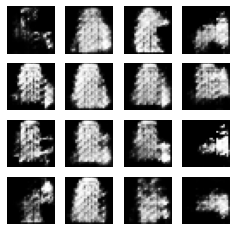

Time for training : 306 sec


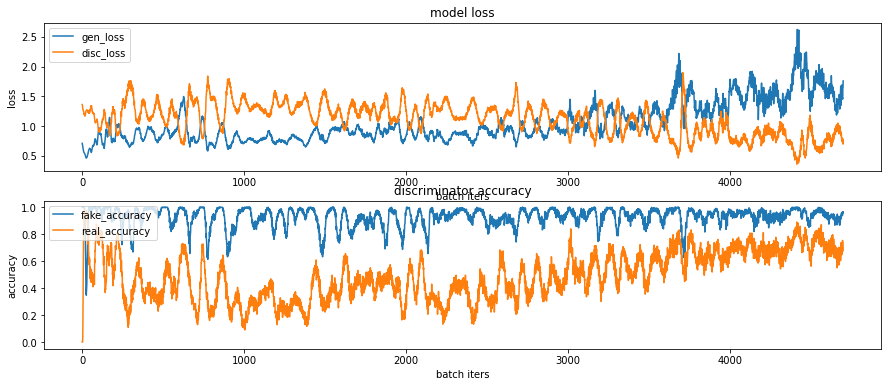

CPU times: user 2min 36s, sys: 27.5 s, total: 3min 3s
Wall time: 5min 6s


In [40]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

만약 생성자가 만든 Fake Image에 대한 판별자의 Accuracy(fake_accuracy)가 계속 1에 가깝게 유지되고 있다면, 생성자가 만든 이미지가 아직 판별자를 성공적으로 속이지 못하고 있다는 뜻입니다.  

보다 나은 결과물을 만들기 위해서는 더욱 많은 epoch으로 학습을 시켜야 합니다. 결과물이 아직 흐릿하다면 더욱 많은 학습을 시켜보세요!  
과연 생성 모델이 이전에는 없던 새로운 디자인의 패션을 만들어내는 것을 확인할 수 있을 거예요..! (물론 시간은 그와 비례하게 늘어나겠죠..?)  

어쩌면 단순히 학습 수행 시간만 늘리는 것보다, 모델 구조나 학습 방법을 바꾸어 봐야 할 수도 있습니다. 그래프를 유심히 보면서 학습 결과가 더 이상 개선되고 있지 않은지 여부를 지속적으로 살펴봅시다.

In [42]:
# 에폭 20에서 30으로 상향 조정
save_every = 5
EPOCHS = 30

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

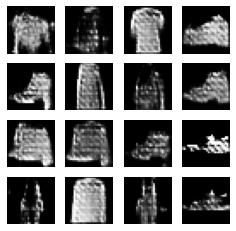

Time for training : 451 sec


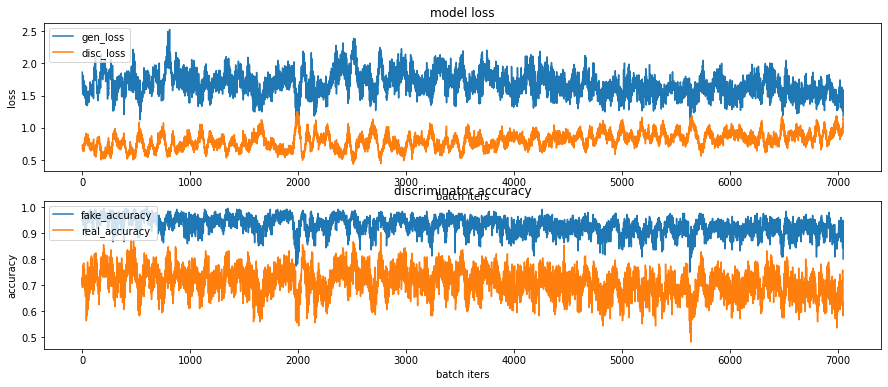

CPU times: user 3min 50s, sys: 41.2 s, total: 4min 31s
Wall time: 7min 32s


In [44]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

In [45]:
# 에폭 30에서 40으로 상향 조정
save_every = 5
EPOCHS = 40

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

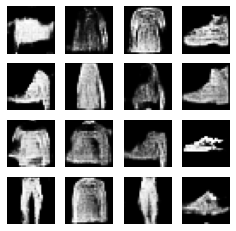

Time for training : 602 sec


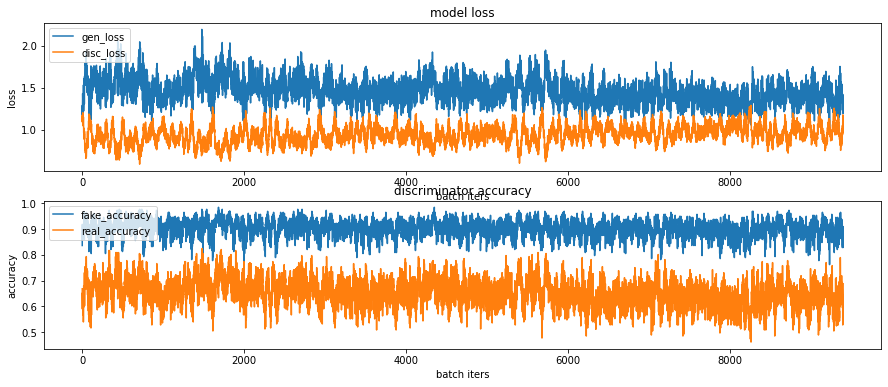

CPU times: user 5min 8s, sys: 55.1 s, total: 6min 3s
Wall time: 10min 3s


In [46]:
%%time
train(train_dataset, EPOCHS, save_every)

### 학습과정 시각화하기
학습이 끝난 후 우리가 생성했던 샘플 이미지들을 합쳐 GIF 파일, 일명 움짤로 만들어 보겠습니다. 더욱 생생한 학습 진행 과정을 확인해 볼 수 있을 테니까요!  

GIF 파일은 우리가 오래전에 import 해놓았던 imageio 라이브러리를 활용해 만들 수 있습니다.  
imageio.get_writer를 활용해서 파일을 열고, 거기에 append_data로 이미지를 하나씩 붙여나가는 방식입니다.  
아래 코드가 무사히 실행되면, fasion_mnist_dcgan.gif 파일이 저장되어 있는 것을 확인할 수 있을 겁니다!

In [47]:
# 샘플 이미지들로 gif 파일 만들기

anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif

-rw-r--r-- 1 root root 820534 Jan 23 01:38 /aiffel/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif


---
## 회고
생성자와 판별자의 경쟁으로 더 좋은 성능의 모델을 만들게 되는 구조가 재미있다.  
구현 단계가 길고 복잡해서 어렵지만 하나씩 뜯어보고 여러 번 반복하여 익혀야겠다.

## Reference
- [np.random.randint : numpy에서 랜덤으로 정수 추출하는 함수](https://wikidocs.net/193810)
- [GAN model 구현](https://www.tensorflow.org/tutorials/generative/dcgan?hl=ko)
- [OpenAI-생성형 모델](Variational Autoencoders (VAEs))
    - [Variational Autoencoders (VAEs) ]()
    - [자기회귀모델:autoregressive models](https://aws.amazon.com/ko/what-is/autoregressive-models/)
- [Transposed Convolution 영문](https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11)
- [Transposed Convolution 한글](https://velog.io/@hayaseleu/Transposed-Convolutional-Layer%EC%9D%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EA%B0%80)